In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os,sys
import rdkit
from rdkit import Chem
import seaborn as sns
import orjson

In [2]:
%matplotlib inline

In [3]:
def load_configfn(configfn):
    with open(configfn, 'rb') as f:
        config = orjson.loads(f.read())
    return config

In [4]:
configfn = "../config_real_db.json"
config = load_configfn(configfn)
datadir = config["result_path"]
project_name = config["project_name"]

In [5]:
def get_top_all_iter(i_iter, ntop):
    df_all = None
    for i in range(1, i_iter+1):
        infn = os.path.join(datadir, f"{project_name}_train{i}_vs_results.aug.feather")
        df = pd.read_feather(infn)
        df['i_iter'] = [i]*len(df)
        if df_all is None:
            df.sort_values(by='dG', inplace=True)
            df_all = df[:ntop]
        else:
            df.sort_values(by='dG', inplace=True)
            df_all = pd.concat([df_all, df[:ntop]], ignore_index=True)
    df_all.sort_values(by='dG', inplace=True)
    return df_all[:ntop]

In [6]:
plt.style.use('seaborn-v0_8-bright')

In [7]:
bins = np.arange(-30, -10, 1)
ntop = 100

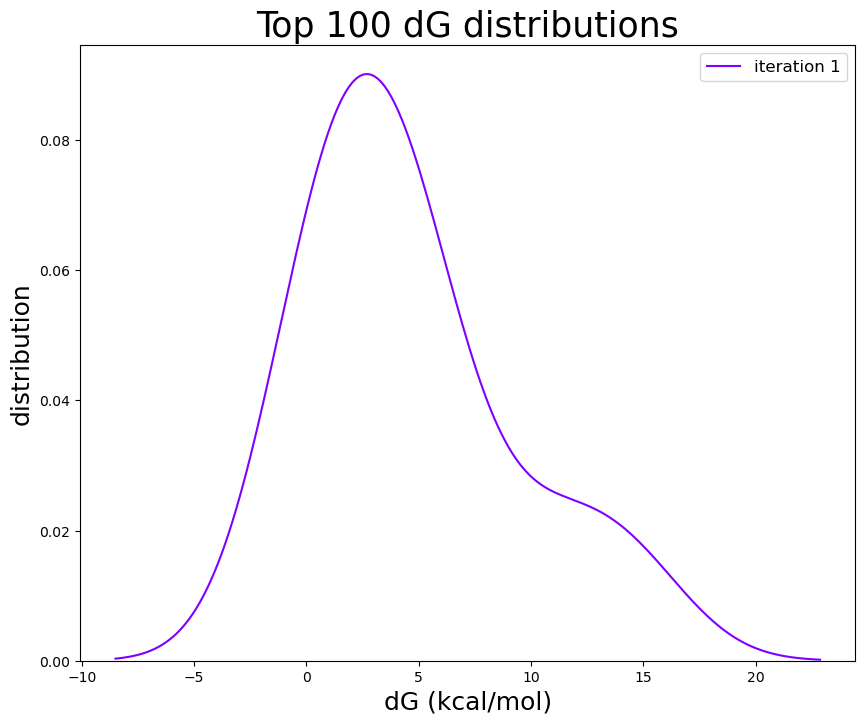

In [8]:
cmap = plt.get_cmap('rainbow')
n_iters = 10
colors = [cmap(i) for i in np.linspace(0, 1, n_iters)] 

plt.figure(figsize=(10,8))
#for i_iter in [1,2, 3,4, 5,6, 7,8, 9, 10]:
for i_iter in range(1, n_iters+1):
    infn = os.path.join(datadir, f"{project_name}_train{i_iter}_vs_results.aug.feather")
    if not os.path.exists(infn):
        continue
    df = get_top_all_iter(i_iter, ntop=ntop)
    sns.kdeplot(df[:ntop]['dG'],label=f"iteration {i_iter}", color=colors[i_iter-1], linewidth=1.5)

plt.xlabel('dG (kcal/mol)', fontsize=18)
plt.ylabel('distribution', fontsize=18)
plt.title(f"Top {ntop} dG distributions", fontsize=25)

plt.legend(fontsize=12)
plt.savefig(f"dG_vs_iteration_{ntop}.{project_name}.png", dpi=300)

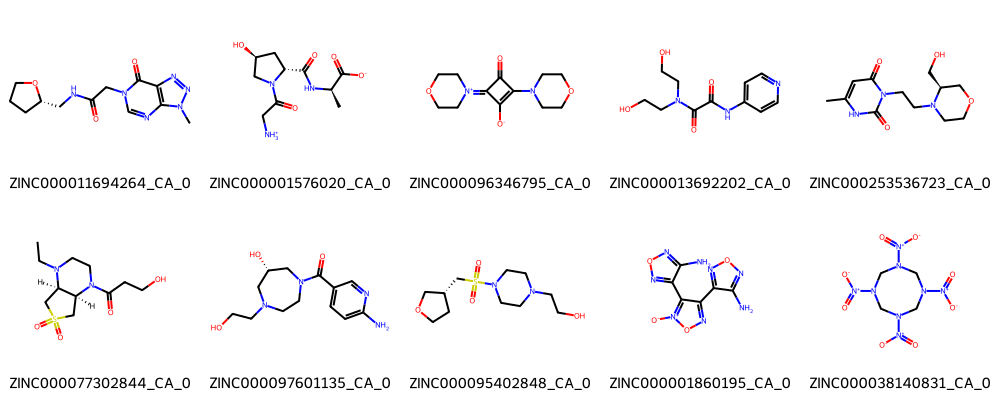

<Figure size 640x480 with 0 Axes>

In [9]:
mols = [Chem.MolFromSmiles(smi) for smi in df['smiles']]
plt.tight_layout()
labels = list( df['ligandname'][:50] )
Chem.Draw.MolsToGridImage(mols[:50], molsPerRow=5, legends=labels, subImgSize=(200, 200))

In [10]:
df[:10]

,zincid,score,complexscore,dG,ligandname,description,smiles,fp_binary,i_iter
4,ZINC000011694264,-949.827,-949.828,0.120,ZINC000011694264_CA_0,E3L_6DO3_0_3.6DO3_0001.lig_0001_0001,Cn1nnc2c1ncn(CC(=O)NC[C@@H]1CCCO1)c2=O,b'\xe0\xff\xff\xff\x00\x04\x00\x00+\x00\x00\x0...,1
2,ZINC000001576020,-940.644,-940.644,0.918,ZINC000001576020_CA_0,E3L_6DO3_0_2.6DO3_0001.lig_0001_0002,C[C@@H](NC(=O)[C@H]1C[C@H](O)CN1C(=O)C[NH3+])C...,b'\xe0\xff\xff\xff\x00\x04\x00\x00 \x00\x00\x0...,1
0,ZINC000096346795,-948.649,-948.649,1.119,ZINC000096346795_CA_0,E3L_6DO3_0_2.6DO3_0001.lig_0001_0001,O=c1c(N2CCOCC2)c([O-])c1=[N+]1CCOCC1,b'\xe0\xff\xff\xff\x00\x04\x00\x00\x18\x00\x00...,1
3,ZINC000013692202,-942.963,-942.964,1.265,ZINC000013692202_CA_0,E3L_6DO3_0_0.6DO3_0001.lig_0001_0001,O=C(Nc1ccncc1)C(=O)N(CCO)CCO,b'\xe0\xff\xff\xff\x00\x04\x00\x00\x1c\x00\x00...,1
7,ZINC000253536723,-943.102,-943.103,3.825,ZINC000253536723_CA_0,E3L_6DO3_0_3.6DO3_0001.lig_0001_0002,Cc1cc(=O)n(CCN2CCOC[C@@H]2CO)c(=O)[nH]1,b'\xe0\xff\xff\xff\x00\x04\x00\x00&\x00\x00\x0...,1
6,ZINC000077302844,-948.987,-948.987,4.313,ZINC000077302844_CA_0,E3L_6DO3_0_4.6DO3_0001.lig_0001_0001,CCN1CCN(C(=O)CCO)[C@H]2CS(=O)(=O)C[C@H]21,b'\xe0\xff\xff\xff\x00\x04\x00\x00\x1c\x00\x00...,1
9,ZINC000097601135,-944.844,-944.844,4.416,ZINC000097601135_CA_0,E3L_6DO3_0_4.6DO3_0001.lig_0001_0002,Nc1ccc(C(=O)N2CCN(CCO)C[C@H](O)C2)cn1,b'\xe0\xff\xff\xff\x00\x04\x00\x00&\x00\x00\x0...,1
8,ZINC000095402848,-932.900,-932.900,5.544,ZINC000095402848_CA_0,E3L_6DO3_0_1.6DO3_0001.lig_0001_0002,O=S(=O)(C[C@@H]1CCOC1)N1CCN(CCO)CC1,b'\xe0\xff\xff\xff\x00\x04\x00\x00\x1a\x00\x00...,1
5,ZINC000001860195,-947.747,-947.747,10.507,ZINC000001860195_CA_0,E3L_6DO3_0_1.6DO3_0001.lig_0001_0001,Nc1nonc1-c1no[n+]([O-])c1-c1nonc1N,b'\xe0\xff\xff\xff\x00\x04\x00\x00\x19\x00\x00...,1
1,ZINC000038140831,-918.986,-918.987,14.250,ZINC000038140831_CA_0,E3L_6DO3_0_0.6DO3_0001.lig_0001_0002,O=[N+]([O-])N1CN([N+](=O)[O-])CN([N+](=O)[O-])...,b'\xe0\xff\xff\xff\x00\x04\x00\x00\x0b\x00\x00...,1
